In [13]:


import cifar10
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn import neural_network
from sklearn.neural_network import MLPClassifier





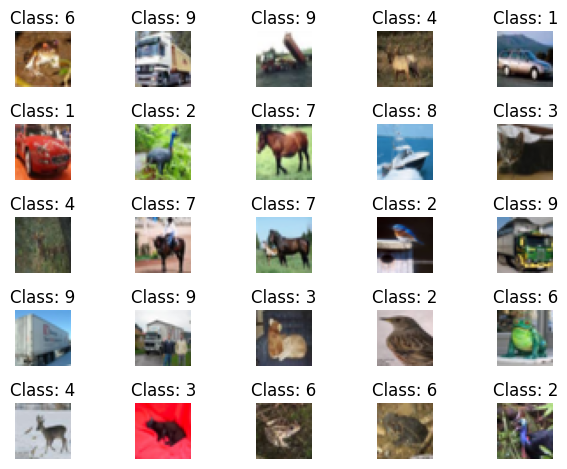

In [14]:
batch_gen = cifar10.data_batch_generator()
images = []
labels = []
cols = 5
rows = 5
data_generator = cifar10.test_batch_generator()
for i, (data, label) in enumerate(data_generator):
#   if i == cols*rows:
#     break
  images.append(data)
  labels.append(label)

fig, axs = plt.subplots(cols, rows)

# Plot the first 10 images
for i in range(cols):
  for j in range(rows):
    index = i * cols + j
    axs[i, j].imshow(images[index])
    axs[i, j].set_title(f"Class: {labels[index]}")
    axs[i, j].axis('off')  # Hide axes for cleaner visualization

# Make the plot visible
plt.tight_layout()
plt.show()


In [15]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# print(y_train.dtype)
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0





In [16]:
xtrain1 = x_train.reshape(x_train.shape[0], -1)
xtest1 = x_test.reshape(x_test.shape[0], -1)
ytrain1 = y_train.flatten()
ytest1 = y_test.flatten()

# Print the shapes to verify
print("xtrain1 shape:", xtrain1.shape)
print("xtest1 shape:", xtest1.shape)


xtrain1 shape: (50000, 3072)
xtest1 shape: (10000, 3072)


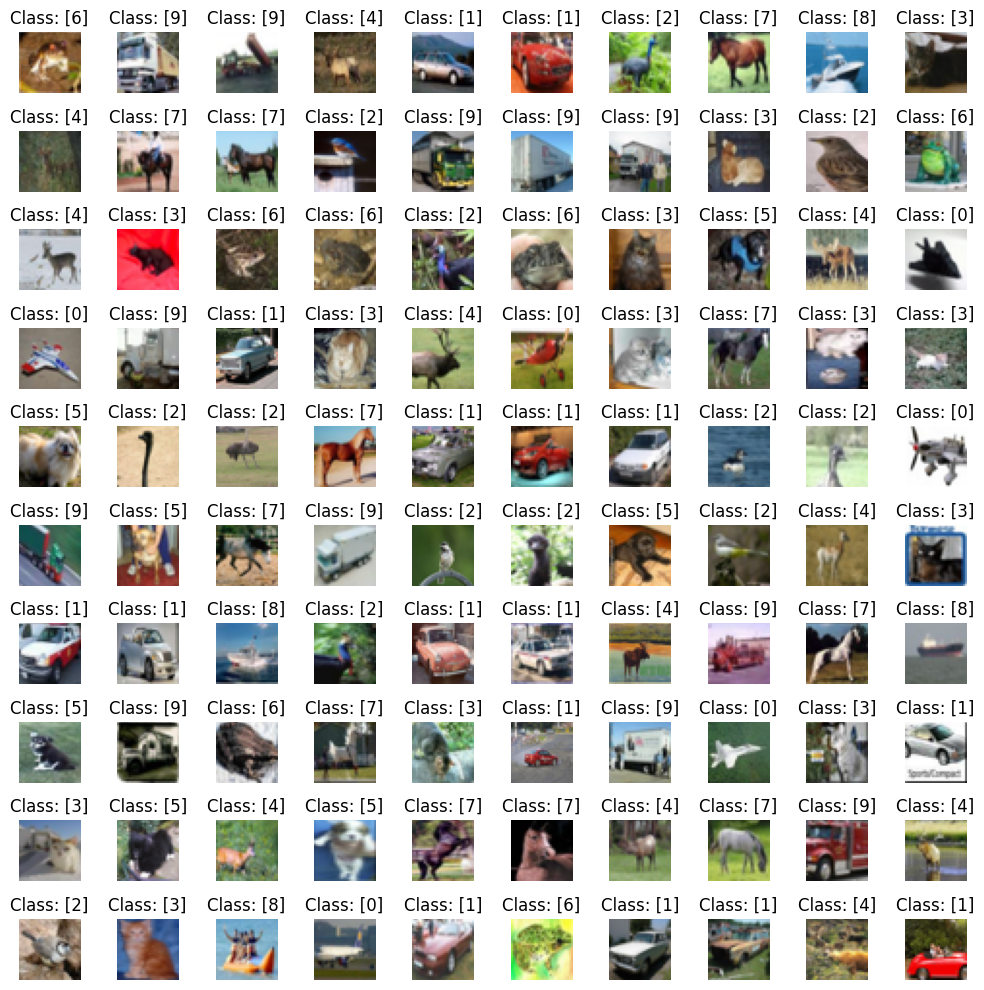

In [17]:
def show_images(images, labels, num_images=25):
    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            axes[i,j].set_title(f'Class: {labels[img_ctr]}')
            # axes[i]

            
            axes[i,j].imshow(images[img_ctr])
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()
    


show_images(x_train, y_train, 100)

In [18]:
from sklearn.neural_network import MLPClassifier as MLPClassifier

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=100, activation='logistic', verbose=True , max_iter = 1000)

In [25]:
mlp.fit(X=xtrain1, y=ytrain1)
# x = mlp.score(x_test, y_test)
# print(x)


Iteration 1, loss = 1.93339113
Iteration 2, loss = 1.75971384
Iteration 3, loss = 1.69179681
Iteration 4, loss = 1.64583531
Iteration 5, loss = 1.60136600
Iteration 6, loss = 1.57370206
Iteration 7, loss = 1.54163579
Iteration 8, loss = 1.51640550
Iteration 9, loss = 1.49914824
Iteration 10, loss = 1.47439716
Iteration 11, loss = 1.45501213
Iteration 12, loss = 1.44325786
Iteration 13, loss = 1.42604310
Iteration 14, loss = 1.41277018
Iteration 15, loss = 1.39778468
Iteration 16, loss = 1.38916967
Iteration 17, loss = 1.37392566
Iteration 18, loss = 1.35887108
Iteration 19, loss = 1.34927301
Iteration 20, loss = 1.33419917
Iteration 21, loss = 1.32321478
Iteration 22, loss = 1.31425478
Iteration 23, loss = 1.31033271
Iteration 24, loss = 1.30028484
Iteration 25, loss = 1.28765677
Iteration 26, loss = 1.27759638
Iteration 27, loss = 1.26681722
Iteration 28, loss = 1.26278986
Iteration 29, loss = 1.25459878
Iteration 30, loss = 1.24808136
Iteration 31, loss = 1.23723287
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=1000,
              verbose=True)

In [26]:
from sklearn.metrics import accuracy_score
ypred1 = mlp.predict(xtrain1)

# Evaluate the classifier
accuracy = accuracy_score(ypred1, ytrain1)

ypred2 = mlp.predict(xtest1)
accuracy2 = accuracy_score(ypred2, ytest1)

In [27]:
print(accuracy)
print(accuracy2)

0.91844
0.4522


Number of neurons: 50, Test set accuracy: 16.44%
Number of neurons: 100, Test set accuracy: 13.37%
Number of neurons: 150, Test set accuracy: 10.00%
Number of neurons: 200, Test set accuracy: 10.00%
Number of neurons: 250, Test set accuracy: 10.00%


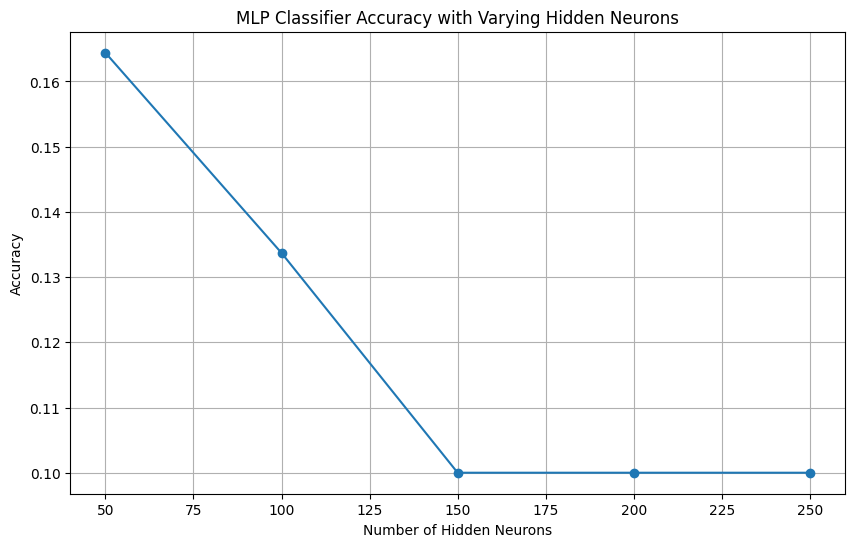

In [23]:
neuron_range = [50, 100, 150, 200, 250]
accuracy_scores = []

for neurons in neuron_range:
    # Train an MLP classifier with varying hidden neurons
    mlp = MLPClassifier(hidden_layer_sizes=neurons, activation='logistic', verbose=False , max_iter = 1000)
    
    mlp.fit(xtrain1, ytrain1)

    # Predict on the test data
    y_pred = mlp.predict(xtest1)

    # Evaluate the classifier
    accuracy = accuracy_score(ytest1, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Number of neurons: {neurons}, Test set accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(neuron_range, accuracy_scores, marker='o')
plt.title('MLP Classifier Accuracy with Varying Hidden Neurons')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [29]:
def select_best (accuracy_scores, neurons) : 
    max_idx = 0; 
    max_score = 0; 
    for idx, score in enumerate(accuracy_scores): 
        if score > max_score: 
            max_score = score; 
            max_idx = idx; 


    return neurons[max_idx]

In [30]:
best_neuron_sample = select_best(accuracy_scores, neurons=neuron_range)

In [ ]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
for activation in activation_functions:
    # Train an MLP classifier with varying activation functions
    mlp = MLPClassifier(hidden_layer_sizes=best_neuron_sample, activation='logistic', verbose=False , max_iter = 1000)
    
    mlp.fit(xtrain1, y_train)

    # Predict on the test data
    y_pred = mlp.predict(xtest1)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Activation: {activation}, Test set accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, accuracy_scores, color='blue')
plt.title('MLP Classifier Accuracy with Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()